<a href="https://colab.research.google.com/github/Adiya21j/Basketball_Logit_Blog/blob/master/House_loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
#upload files
from google.colab import files
files.upload()

Saving sample_submission_49d68Cx.csv to sample_submission_49d68Cx.csv
Saving test_lAUu6dG.csv to test_lAUu6dG.csv
Saving train_ctrUa4K.csv to train_ctrUa4K.csv


{'sample_submission_49d68Cx.csv': b'Loan_ID,Loan_Status\r\nLP001015,N\r\nLP001022,N\r\nLP001031,N\r\nLP001035,N\r\nLP001051,N\r\nLP001054,N\r\nLP001055,N\r\nLP001056,N\r\nLP001059,N\r\nLP001067,N\r\nLP001078,N\r\nLP001082,N\r\nLP001083,N\r\nLP001094,N\r\nLP001096,N\r\nLP001099,N\r\nLP001105,N\r\nLP001107,N\r\nLP001108,N\r\nLP001115,N\r\nLP001121,N\r\nLP001124,N\r\nLP001128,N\r\nLP001135,N\r\nLP001149,N\r\nLP001153,N\r\nLP001163,N\r\nLP001169,N\r\nLP001174,N\r\nLP001176,N\r\nLP001177,N\r\nLP001183,N\r\nLP001185,N\r\nLP001187,N\r\nLP001190,N\r\nLP001203,N\r\nLP001208,N\r\nLP001210,N\r\nLP001211,N\r\nLP001219,N\r\nLP001220,N\r\nLP001221,N\r\nLP001226,N\r\nLP001230,N\r\nLP001231,N\r\nLP001232,N\r\nLP001237,N\r\nLP001242,N\r\nLP001268,N\r\nLP001270,N\r\nLP001284,N\r\nLP001287,N\r\nLP001291,N\r\nLP001298,N\r\nLP001312,N\r\nLP001313,N\r\nLP001317,N\r\nLP001321,N\r\nLP001323,N\r\nLP001324,N\r\nLP001332,N\r\nLP001335,N\r\nLP001338,N\r\nLP001347,N\r\nLP001348,N\r\nLP001351,N\r\nLP001352,N\r\nLP0

In [32]:
#reading data 
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")
sub = pd.read_csv("sample_submission_49d68Cx.csv")

train_original = train.copy()
test_original = test.copy()

In [33]:
train.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [34]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.shape , test.shape

((614, 13), (367, 12))

## Univariate Analysis

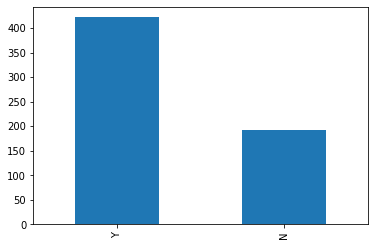

In [ ]:
train['Loan_Status'].value_counts().plot.bar()

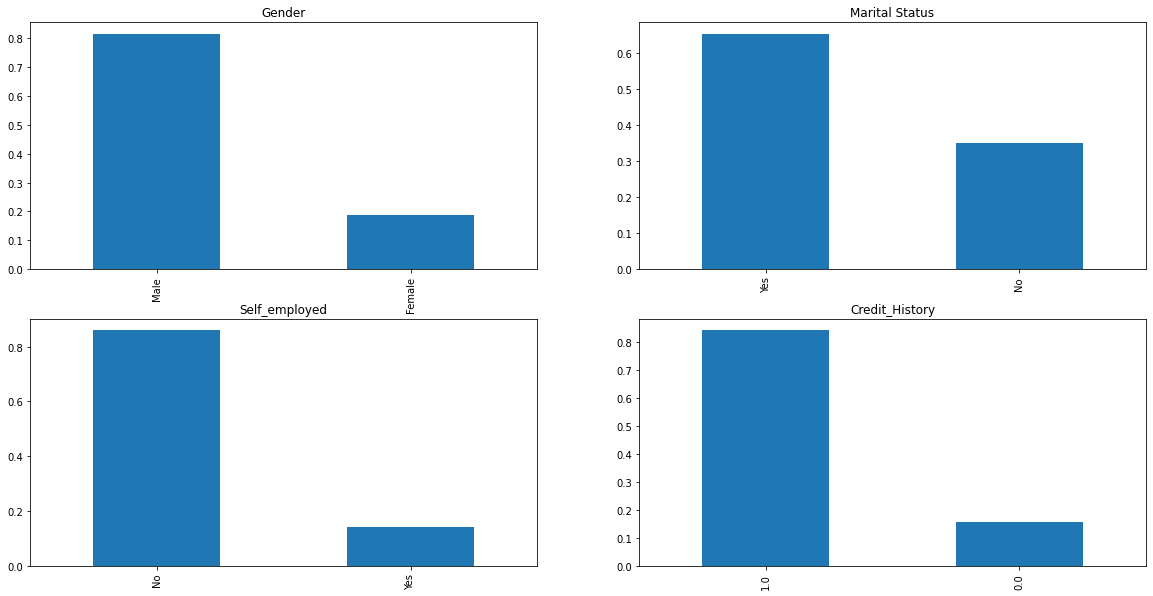

In [ ]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (20, 10), title = 'Gender')

plt.subplot(222) 
train['Married'].value_counts(normalize = True).plot.bar(figsize = (20, 10), title = 'Marital Status')

plt.subplot(223) 
train['Self_Employed'].value_counts(normalize = True).plot.bar(figsize = (20, 10), title = 'Self_employed')

plt.subplot(224) 
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize = (20, 10), title = 'Credit_History')

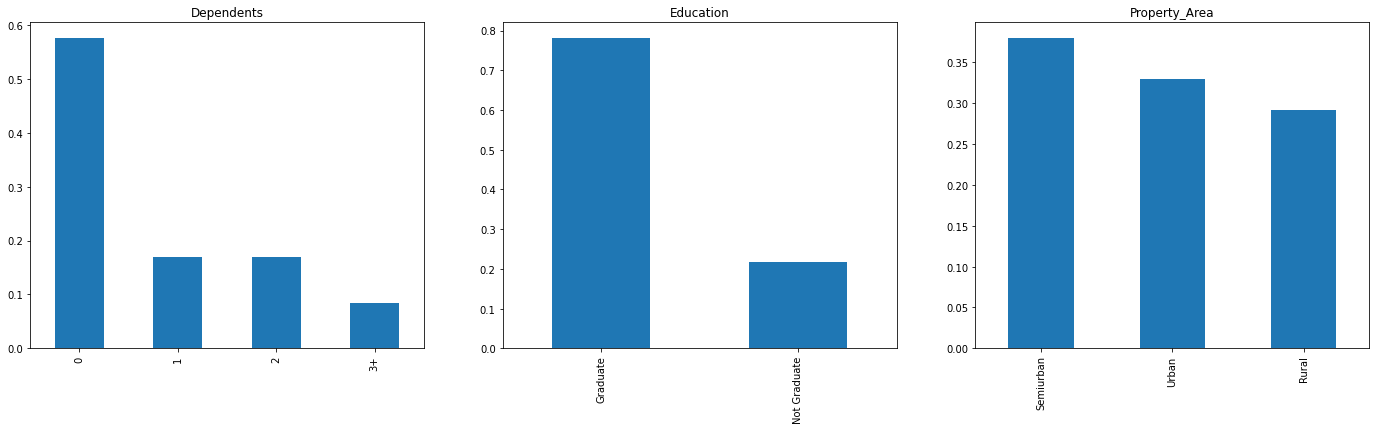

In [ ]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (24,6), title = "Dependents")

plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(figsize = (24,6), title = "Education")

plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize = (24,6), title = "Property_Area")

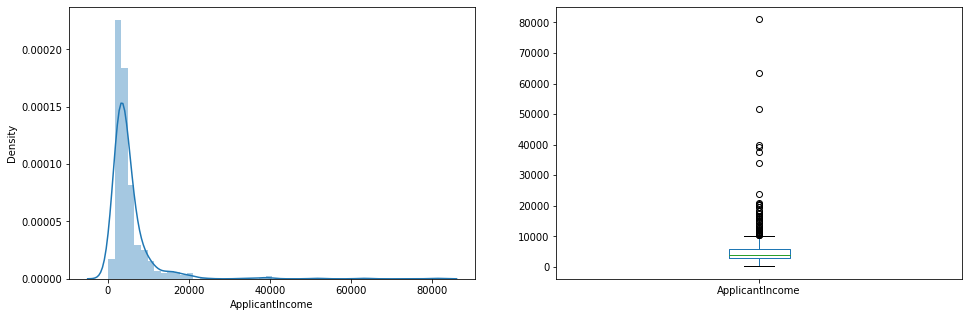

In [ ]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome'])

plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize = (16,5))
plt.show()

Text(0.5, 0.98, '')

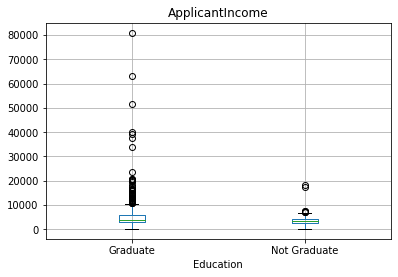

In [ ]:
train.boxplot(column = 'ApplicantIncome', by = 'Education') 
plt.suptitle("")

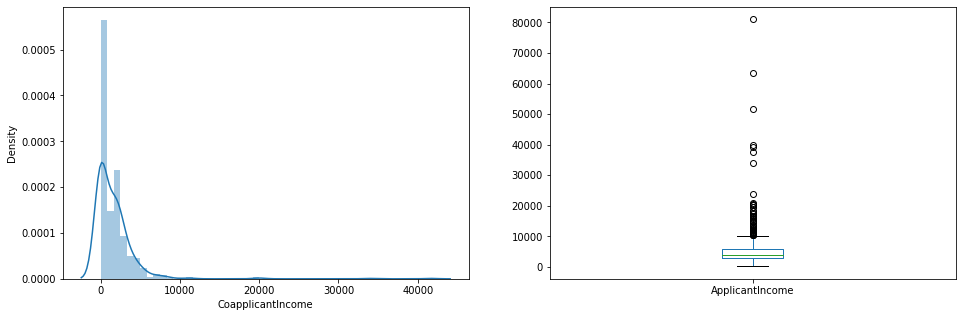

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (16,5))
plt.show()


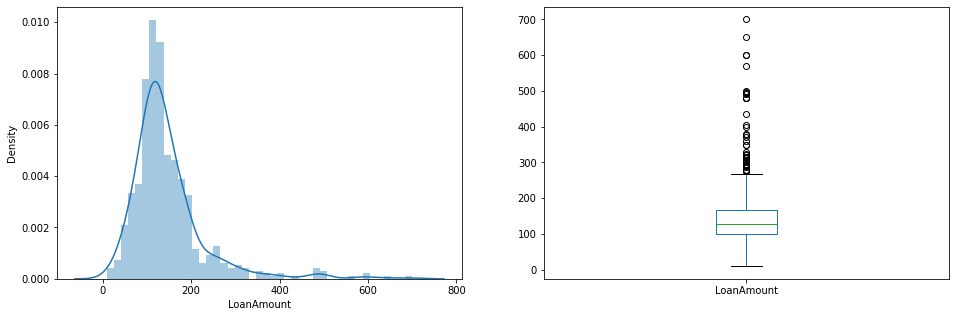

In [ ]:
plt.figure(1) 
plt.subplot(121)
df = train.dropna()
sns.distplot(train['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize = (16, 5))
plt.show()

## Bivariate Analysis

Categorical Independent Variable VS Target variable

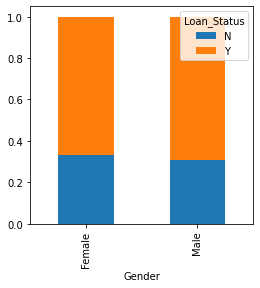

In [ ]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True, figsize = (4, 4))

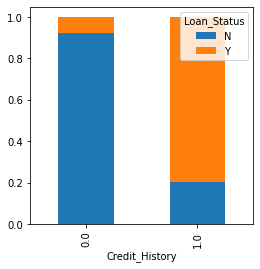

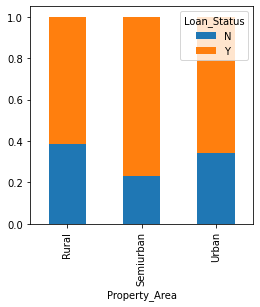

In [ ]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True, figsize = (4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True, figsize = (4,4))
plt.show()

Numerical variable VS Target Variable

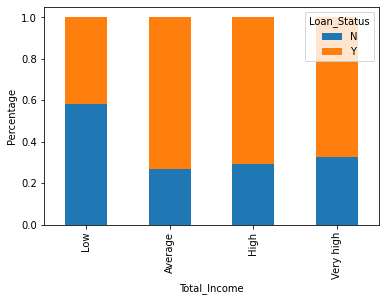

In [ ]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels = group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

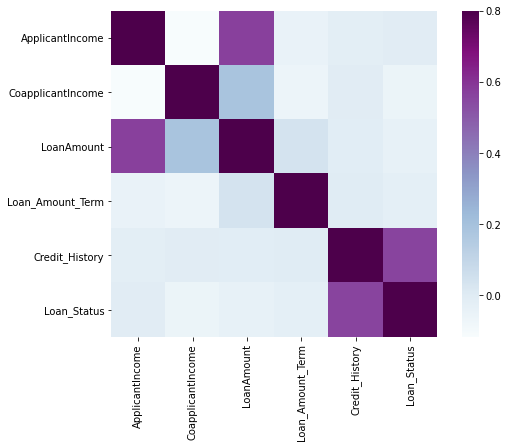

In [ ]:
train = train.drop([ 'Total_Income_bin', 'Total_Income'], axis = 1)

train['Dependents'].replace('3+', 3, inplace = True)
test['Dependents'].replace('3+', 3, inplace = True)
train['Loan_Status'].replace('N', 0, inplace = True)
train['Loan_Status'].replace('Y', 1, inplace = True)

matrix = train.corr()
f, ax = plt.subplots(figsize = (9, 6))
sns.heatmap(matrix, vmax=.8, square = True, cmap='BuPu')

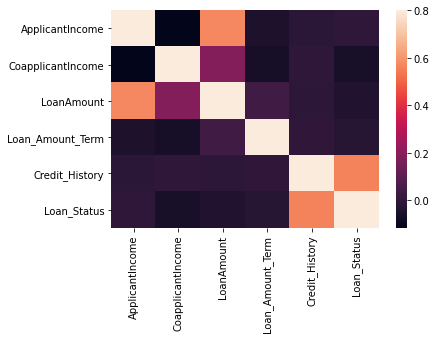

In [ ]:

matrix1 = train.corr()
sns.heatmap(matrix, vmax=.8)

## Missing value and Outlier treatments

In [35]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
#Impute missing values
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)

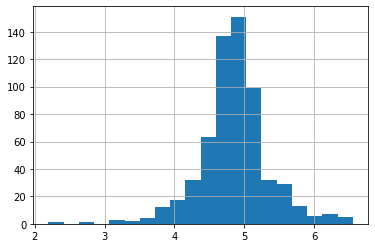

In [37]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

## Model Building PART1

In [38]:
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

In [39]:
#seperate target variable and independent variable
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [40]:
#make dummy variables for the categorical variables.
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [30]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [16]:
from sklearn .model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight = None, dual=False, fit_intercept = True, intercept_scaling = 1, max_iter = 100, multi_class = 'ovr', n_jobs = 1, 
                   penalty = 'l2', random_state = 1, solver = 'liblinear', tol = 0.0001, verbose = 0, warm_start = False)
#predict the Loan_Status for validation set and calculate its accuracy
pred_cv = model.predict(x_cv)


In [18]:
#Let's calculate how accurate our predictions are by calculating the accuracy.
accuracy_score(y_cv, pred_cv)

0.7891891891891892

In [19]:
#let's make predictions for test data
pred_test = model.predict(test)

In [20]:
sub['Loan_Status'] = pred_test
sub['Loan_ID'] = test_original['Loan_ID']

In [22]:
sub['Loan_Status'].replace(0, 'N', inplace = True)
sub['Loan_Status'].replace(1, 'Y', inplace = True)

In [23]:
#pd.Dateframe(sub, columns=['Loan_ID, 'Loan_Status']).to_csv('Logistic.csv')

## Logistic regression using stratify K-fold

In [41]:
from sklearn.model_selection import StratifiedKFold

In [42]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle = True)
for train_index, test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i, kf.n_splits))
  xtr, xvl = X.loc[train_index], X.loc[test_index]
  ytr, yvl = y[train_index], y[test_index]
  model = LogisticRegression(random_state = 1)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test)
  print('accuracy_score', score)
  i+=1
  pred_test = model.predict(test)
  pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


In [46]:
yvl.replace('N', 0, inplace = True)
yvl.replace('Y', 1, inplace = True)

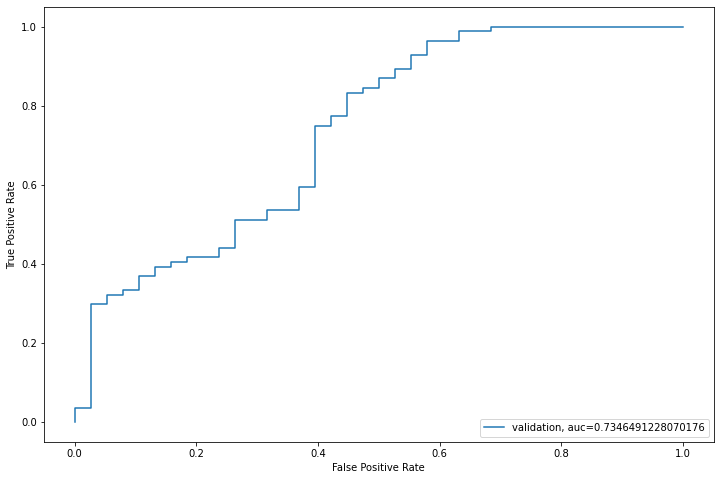

In [47]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label = "validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


In [49]:
sub['Loan_Status'] = pred_test
sub['Loan_ID'] = test_original['Loan_ID']

## Feature engineering

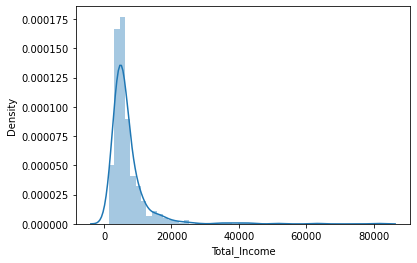

In [51]:
#Create Total_Income feature
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

sns.distplot(train['Total_Income'])

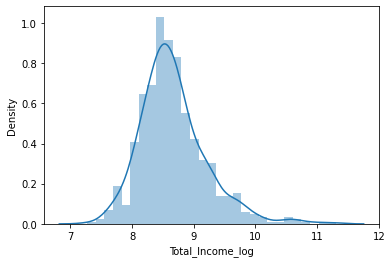

In [52]:
#shift distribution
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

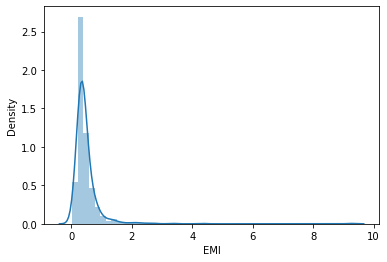

In [53]:
#Create EMI feature
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = train['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI'])

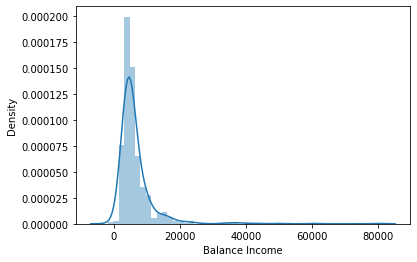

In [54]:
#Create Balance Income feature
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000)
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000)
sns.distplot(train['Balance Income'])

In [55]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)

## Model building Part II

In [ ]:
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

Decision Tree Model

In [56]:
from sklearn import tree
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i, kf.n_splits))
  xtr, xvl = X.loc[train_index], X.loc[test_index]
  ytr, yvl = y[train_index], y[test_index]
  model = tree.DecisionTreeClassifier(random_state = 1)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test)
  print('accuracy_score', score)
  i+=1
  pred_test = model.predict(test)
  pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7073170731707317

2 of kfold 5
accuracy_score 0.7235772357723578

3 of kfold 5
accuracy_score 0.7073170731707317

4 of kfold 5
accuracy_score 0.7154471544715447

5 of kfold 5
accuracy_score 0.6885245901639344


Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i, kf.n_splits))
  xtr, xvl = X.loc[train_index], X.loc[test_index]
  ytr, yvl = y[train_index], y[test_index]
  model = RandomForestClassifier(random_state = 1, max_depth = 30)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test)
  print('accuracy_score', score)
  i+=1
  pred_test = model.predict(test)
  pred = model.predict_proba(xvl)[:,1]



1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.8211382113821138

5 of kfold 5
accuracy_score 0.7377049180327869


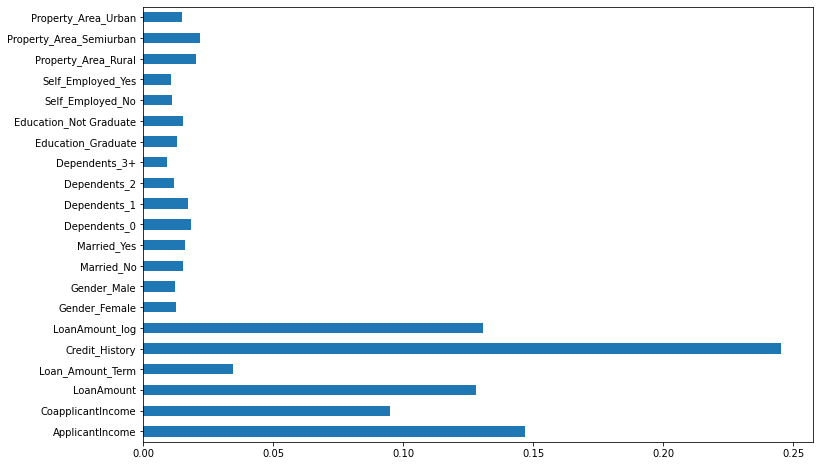

In [59]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind = 'barh', figsize = (12, 8))

XGBOOST


In [1]:
from xgboost import XGBClassifier

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i, kf.n_splits))
  xtr, xvl = X.loc[train_index], X.loc[test_index]
  ytr, yvl = y[train_index], y[test_index]
  model = XGBClassifier(n_estimators = 50, max_depth = 4)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test)
  print('accuracy_score', score)
  i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]

NameError: ignored

In [63]:
train.columns

Index(['Credit_History', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y', 'Total_Income', 'Total_Income_log',
       'EMI', 'Balance Income'],
      dtype='object')

In [64]:
test.columns


Index(['Credit_History', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')